In [ ]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker
from google.colab import files  # Only for Colab users

# Initialize Faker
fake = Faker()

# Define possible categories and items
categories = {
    "Grocery": ["Rice", "Wheat", "Sugar", "Milk", "Eggs", "Flour", "Tea", "Coffee", "Pulses", "Cooking Oil"],
    "Electronics": ["Laptop", "Mobile", "Headphones", "Smartwatch", "Tablet", "Camera", "TV", "Speakers"],
    "Clothing": ["T-shirt", "Jeans", "Jacket", "Sneakers", "Sweater", "Hoodie", "Formal Shirt", "Saree"],
    "Home Essentials": ["Detergent", "Soap", "Shampoo", "Toothpaste", "Mop", "Sanitizer", "Dishwasher Liquid"],
    "Stationery": ["Notebook", "Pen", "Pencil", "Eraser", "Marker", "Stapler", "Highlighter", "Glue"]
}

# List of shop locations
locations = [
    "Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune", "Ahmedabad", "Jaipur", "Lucknow",
    "Indore", "Surat", "Bhopal", "Visakhapatnam", "Nagpur"
]

# Generate dummy data
num_records = 10000  # Adjust for larger dataset
data = []

for _ in range(num_records):
    shop_id = fake.uuid4()[:8]  # Unique Shop ID
    location = random.choice(locations)
    category = random.choice(list(categories.keys()))
    item = random.choice(categories[category])

    sales_count = random.randint(50, 5000)  # More variation in sales
    stock_level = random.randint(5, 500)    # Random stock availability
    demand_score = round(random.uniform(1.0, 5.0), 1)  # Demand rating (1-5 scale)
    profit_margin = round(random.uniform(5, 50), 2)  # Profit percentage

    data.append([shop_id, location, item, category, sales_count, stock_level, demand_score, profit_margin])

# Create DataFrame
df = pd.DataFrame(data, columns=["Shop_ID", "Location", "Item", "Category", "Sales_Count", "Stock_Level", "Demand_Score", "Profit_Margin"])

# Save dataset
df.to_csv("dummy_sales_data.csv", index=False)

print(f"✅ Dummy dataset generated successfully with {num_records} records!")

# Optional: Download dataset (only for Google Colab users)
files.download("dummy_sales_data.csv")


✅ Dummy dataset generated successfully with 10000 records!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("dummy_sales_data.csv")

# Show first 5 rows
df.head()


,Shop_ID,Location,Item,Category,Sales_Count,Stock_Level,Demand_Score,Profit_Margin
0,8e09efc9,Pune,Camera,Electronics,1079,232,4.4,46.40
1,8ed9e3ef,Ahmedabad,Detergent,Home Essentials,429,368,2.9,35.21
2,4487fd35,Hyderabad,Formal Shirt,Clothing,681,200,3.9,27.32
3,b2f6795e,Bangalore,T-shirt,Clothing,2653,200,4.2,11.37
4,ddbdd1a9,Nagpur,Milk,Grocery,3046,387,3.0,43.33


In [ ]:
df.shape  # Outputs (10000, 8) if 10,000 records are generated


(10000, 8)

In [ ]:
df.columns

Index(['Shop_ID', 'Location', 'Item', 'Category', 'Sales_Count', 'Stock_Level',
       'Demand_Score', 'Profit_Margin'],
      dtype='object')

In [ ]:
df.describe()

,Sales_Count,Stock_Level,Demand_Score,Profit_Margin
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,2513.353500,252.59200,2.991180,27.738780
std,1430.768846,143.35297,1.151015,12.932063
min,50.000000,5.00000,1.000000,5.000000
25%,1271.000000,128.00000,2.000000,16.430000
50%,2502.500000,252.00000,3.000000,27.800000
75%,3746.250000,376.00000,4.000000,39.072500
max,5000.000000,500.00000,5.000000,50.000000


In [ ]:
df.isnull().sum()

,0
Shop_ID,0
Location,0
Item,0
Category,0
Sales_Count,0
Stock_Level,0
Demand_Score,0
Profit_Margin,0


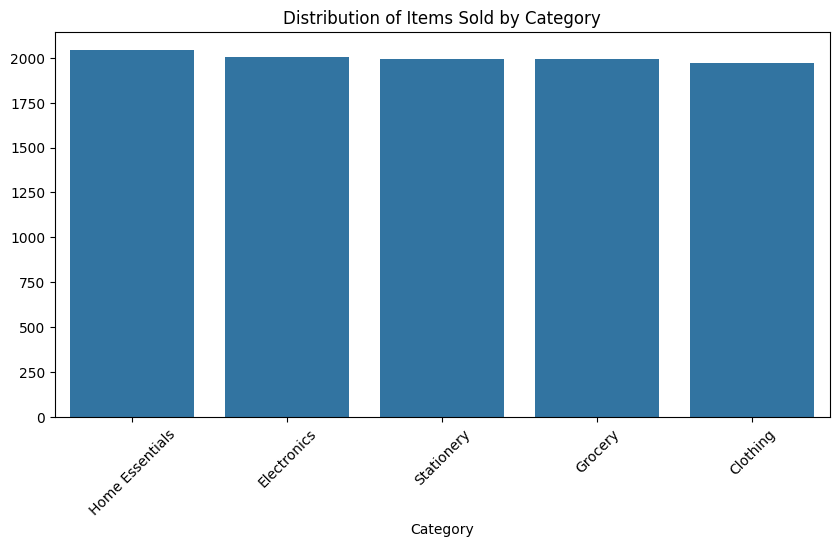

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution per category
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts().values)
plt.title("Distribution of Items Sold by Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Convert columns to appropriate data types
df["Sales_Count"] = df["Sales_Count"].astype(int)
df["Stock_Level"] = df["Stock_Level"].astype(int)
df["Demand_Score"] = df["Demand_Score"].astype(float)
df["Profit_Margin"] = df["Profit_Margin"].astype(float)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize numerical columns
df[["Sales_Count", "Stock_Level", "Demand_Score", "Profit_Margin"]] = scaler.fit_transform(
    df[["Sales_Count", "Stock_Level", "Demand_Score", "Profit_Margin"]]
)


In [ ]:
df.to_csv("preprocessed_sales_data.csv", index=False)
print("✅ Preprocessed data saved successfully!")


✅ Preprocessed data saved successfully!


In [ ]:
import pandas as pd

# Load preprocessed data
df = pd.read_csv("preprocessed_sales_data.csv")

# Competitor Saturation
df["Competitor_Saturation"] = df.groupby(["Location", "Item"])["Shop_ID"].transform("count")

# Reorder Frequency
df["Reorder_Frequency"] = df.groupby(["Shop_ID", "Item"])["Sales_Count"].transform("mean")

# Stock-to-Sales Ratio
df["Stock_to_Sales_Ratio"] = df["Stock_Level"] / (df["Sales_Count"] + 1)  # +1 to avoid division by zero

# Demand-to-Stock Ratio
df["Demand_to_Stock_Ratio"] = df["Demand_Score"] / (df["Stock_Level"] + 1)

# Save updated dataset
df.to_csv("feature_engineered_sales_data.csv", index=False)
print("✅ Feature Engineering Completed & Data Saved!")


✅ Feature Engineering Completed & Data Saved!


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Load feature-engineered dataset
df = pd.read_csv("feature_engineered_sales_data.csv")

# One-Hot Encoding
df = pd.get_dummies(df, columns=["Location", "Category"], drop_first=True)

# Save encoded dataset
df.to_csv("encoded_sales_data.csv", index=False)
print("✅ One-Hot Encoding Completed & Data Saved!")


✅ One-Hot Encoding Completed & Data Saved!


In [ ]:
df=pd.read_csv("encoded_sales_data.csv")
df.head()

,Shop_ID,Item,Sales_Count,Stock_Level,Demand_Score,Profit_Margin,Competitor_Saturation,Reorder_Frequency,Stock_to_Sales_Ratio,Demand_to_Stock_Ratio,...,Location_Lucknow,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam,Category_Electronics,Category_Grocery,Category_Home Essentials,Category_Stationery
0,8e09efc9,Camera,0.207879,0.458586,0.850,0.920000,17,0.207879,0.379662,0.582756,...,False,False,False,True,False,False,True,False,False,False
1,8ed9e3ef,Detergent,0.076566,0.733333,0.475,0.671333,25,0.076566,0.681178,0.274038,...,False,False,False,False,False,False,False,False,True,False
2,4487fd35,Formal Shirt,0.127475,0.393939,0.725,0.496000,22,0.127475,0.349400,0.520109,...,False,False,False,False,False,False,False,False,False,False
3,b2f6795e,T-shirt,0.525859,0.393939,0.800,0.141556,12,0.525859,0.258176,0.573913,...,False,False,False,False,False,False,False,False,False,False
4,ddbdd1a9,Milk,0.605253,0.771717,0.500,0.851778,15,0.605253,0.480745,0.282212,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load encoded dataset
df = pd.read_csv("encoded_sales_data.csv")

# Convert Shop_ID to Categorical Encoding
label_encoder = LabelEncoder()
df["Shop_ID"] = label_encoder.fit_transform(df["Shop_ID"])  # Converts to numeric labels

# Define Features (X) & Target Variable (y)
X = df.drop(columns=["Item"])  # Exclude item names for training
y = df["Sales_Count"]  # Predicting future sales count

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model with Fine-Tuned Parameters
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,  # More trees for better learning
    learning_rate=0.05,  # Lower learning rate for accuracy
    max_depth=6,  # Moderate tree depth
    colsample_bytree=0.8,  # Feature selection improvement
    subsample=0.8,  # Helps with generalization
    random_state=42
)

model.fit(X_train, y_train)

# Predict Recommendation Scores
df["Recommendation_Score"] = model.predict(X)

# Save dataset with recommendation scores
df.to_csv("final_recommendation_data.csv", index=False)
print("✅ Model Training Completed & Recommendations Saved!")


✅ Model Training Completed & Recommendations Saved!


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load encoded dataset
df = pd.read_csv("encoded_sales_data.csv")

# Convert Shop_ID to Categorical Encoding
label_encoder = LabelEncoder()
df["Shop_ID"] = label_encoder.fit_transform(df["Shop_ID"])  # Converts to numeric labels

# Define Features (X) & Target Variable (y)
X = df.drop(columns=["Item"])  # Exclude item names for training
y = df["Sales_Count"]  # Predicting future sales count

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model with Fine-Tuned Parameters
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,  # More trees for better learning
    learning_rate=0.05,  # Lower learning rate for accuracy
    max_depth=6,  # Moderate tree depth
    colsample_bytree=0.8,  # Feature selection improvement
    subsample=0.8,  # Helps with generalization
    random_state=42
)

model.fit(X_train, y_train)

# Predict Recommendation Scores
df["Recommendation_Score"] = model.predict(X)

# Save dataset with recommendation scores
df.to_csv("final_recommendation_data.csv", index=False)
print("✅ Model Training Completed & Recommendations Saved!")


✅ Model Training Completed & Recommendations Saved!


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Compute Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # MSE instead of RMSE
rmse = mse ** 0.5  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


📊 MAE: 0.0012, RMSE: 0.0014, R² Score: 1.0000


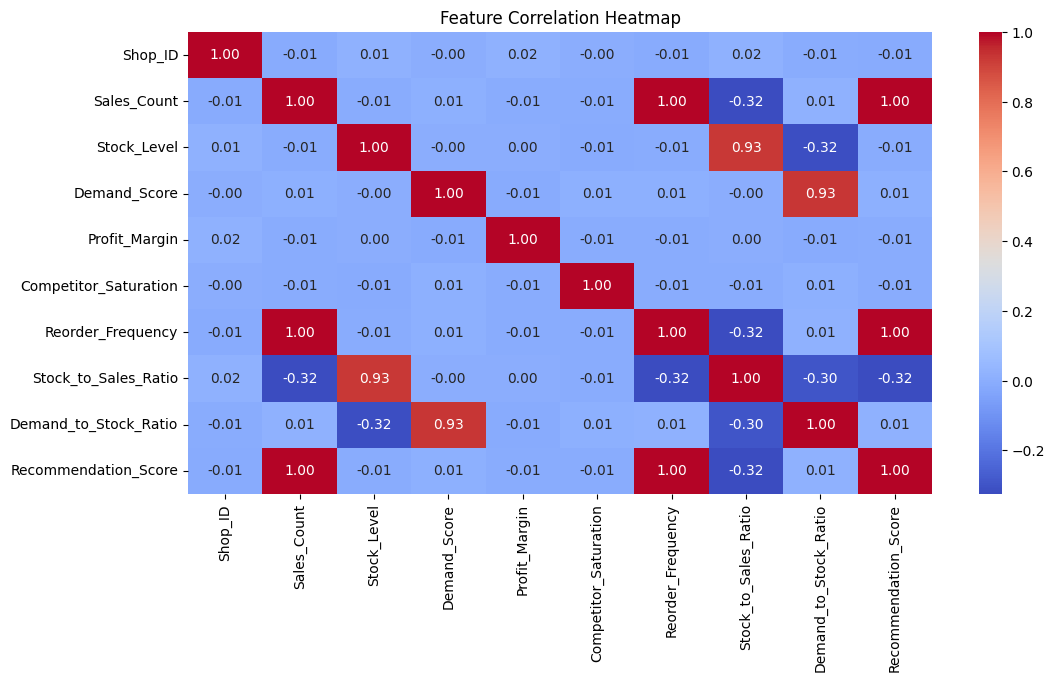

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
X = df.drop(columns=["Item", "Sales_Count", "Stock_to_Sales_Ratio"])  # Drop Sales_Count to prevent leakage
y = df["Sales_Count"]  # Target variable


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🚀 Load the encoded dataset
df = pd.read_csv("encoded_sales_data.csv")

# ✅ Store Shop_ID separately
shop_ids = df["Shop_ID"]
df = df.drop(columns=["Shop_ID"])  # Remove it from training data

# 🎯 Define Features (X) & Target Variable (y)
X = df.drop(columns=["Item"])  # Exclude item names for training
y = df["Sales_Count"]  # Target: Predict future sales count

# 🔀 Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔥 Train XGBoost Model
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# 🔍 Predict on Test Data
y_pred = model.predict(X_test)

# 📊 Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually calculating RMSE
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# 🔮 Predict Recommendation Scores for the Entire Dataset
df["Recommendation_Score"] = model.predict(X)

# ✅ Add Shop_ID back for individual recommendations
df["Shop_ID"] = shop_ids

# 💾 Save the updated dataset
df.to_csv("final_recommendation_data.csv", index=False)
print("✅ Model Retrained & Recommendations Saved Successfully!")


📊 MAE: 0.0021, RMSE: 0.0028, R² Score: 0.9999
✅ Model Retrained & Recommendations Saved Successfully!


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("final_recommendation_data.csv")

# Display sample data
df.head()


,Item,Sales_Count,Stock_Level,Demand_Score,Profit_Margin,Competitor_Saturation,Reorder_Frequency,Stock_to_Sales_Ratio,Demand_to_Stock_Ratio,Location_Bangalore,...,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam,Category_Electronics,Category_Grocery,Category_Home Essentials,Category_Stationery,Recommendation_Score,Shop_ID
0,Camera,0.207879,0.458586,0.850,0.920000,17,0.207879,0.379662,0.582756,False,...,False,True,False,False,True,False,False,False,0.201853,8e09efc9
1,Detergent,0.076566,0.733333,0.475,0.671333,25,0.076566,0.681178,0.274038,False,...,False,False,False,False,False,False,True,False,0.076231,8ed9e3ef
2,Formal Shirt,0.127475,0.393939,0.725,0.496000,22,0.127475,0.349400,0.520109,False,...,False,False,False,False,False,False,False,False,0.126391,4487fd35
3,T-shirt,0.525859,0.393939,0.800,0.141556,12,0.525859,0.258176,0.573913,True,...,False,False,False,False,False,False,False,False,0.529283,b2f6795e
4,Milk,0.605253,0.771717,0.500,0.851778,15,0.605253,0.480745,0.282212,False,...,True,False,False,False,False,True,False,False,0.605325,ddbdd1a9


<ipython-input-33-130917eec2b3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shop_data["Recommendation_Score"], y=shop_data["Item"], palette="viridis")


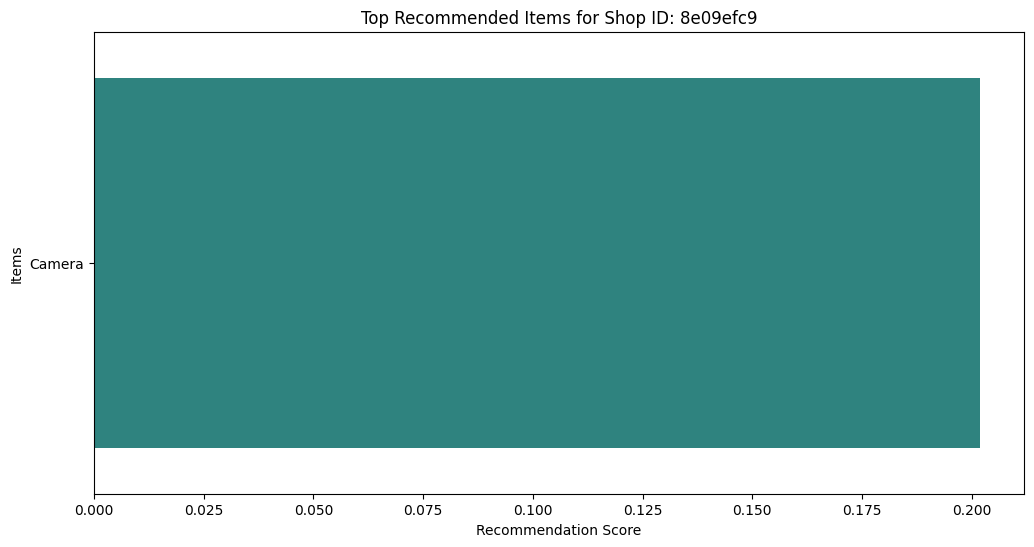

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a specific shop (Replace with any Shop_ID from your dataset)
shop_id = "8e09efc9"  # Example Shop_ID

# Filter data for the shop
shop_data = df[df["Shop_ID"] == shop_id].sort_values(by="Recommendation_Score", ascending=False).head(10)

# Plot recommendations
plt.figure(figsize=(12, 6))
sns.barplot(x=shop_data["Recommendation_Score"], y=shop_data["Item"], palette="viridis")
plt.xlabel("Recommendation Score")
plt.ylabel("Items")
plt.title(f"Top Recommended Items for Shop ID: {shop_id}")
plt.show()


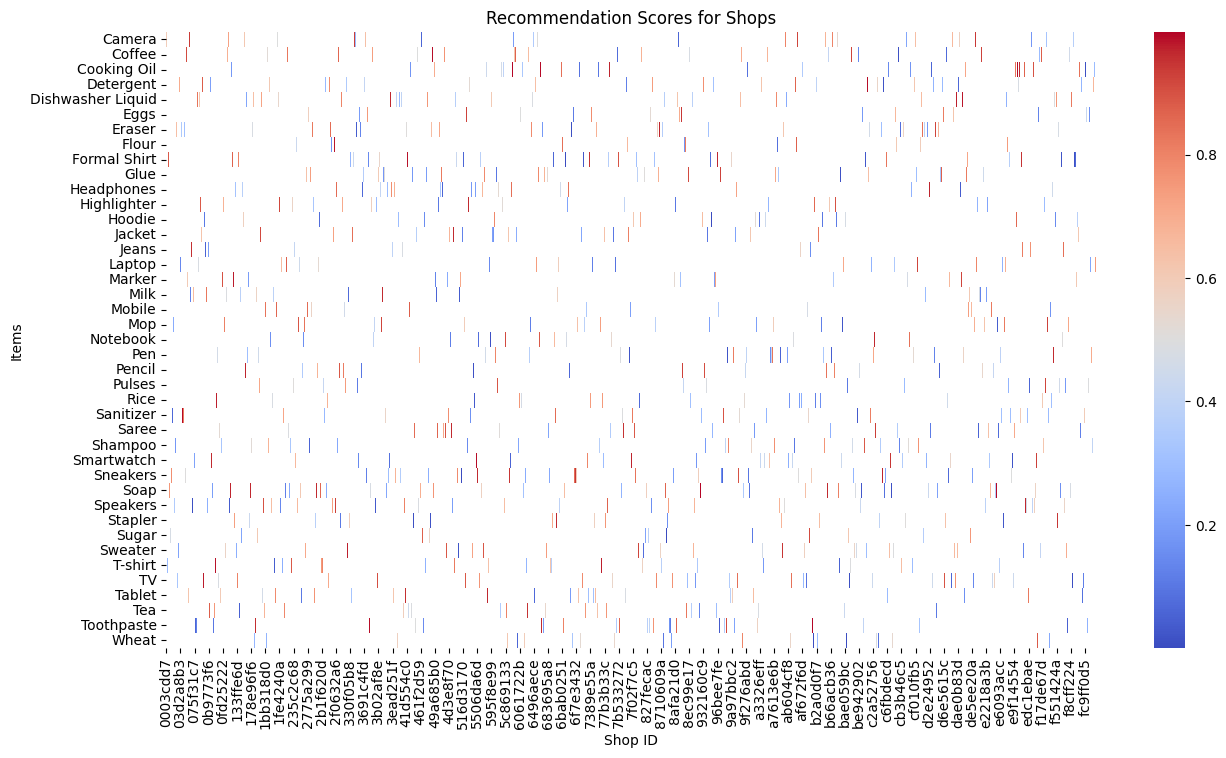

In [ ]:
# Pivot table for heatmap visualization
recommendation_pivot = df.pivot_table(index="Item", columns="Shop_ID", values="Recommendation_Score")

plt.figure(figsize=(15, 8))
sns.heatmap(recommendation_pivot, cmap="coolwarm", annot=False)
plt.xlabel("Shop ID")
plt.ylabel("Items")
plt.title("Recommendation Scores for Shops")
plt.show()


<ipython-input-36-ba35fb2a0209>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shop_data["Recommendation_Score"], y=shop_data["Item"], palette="viridis")


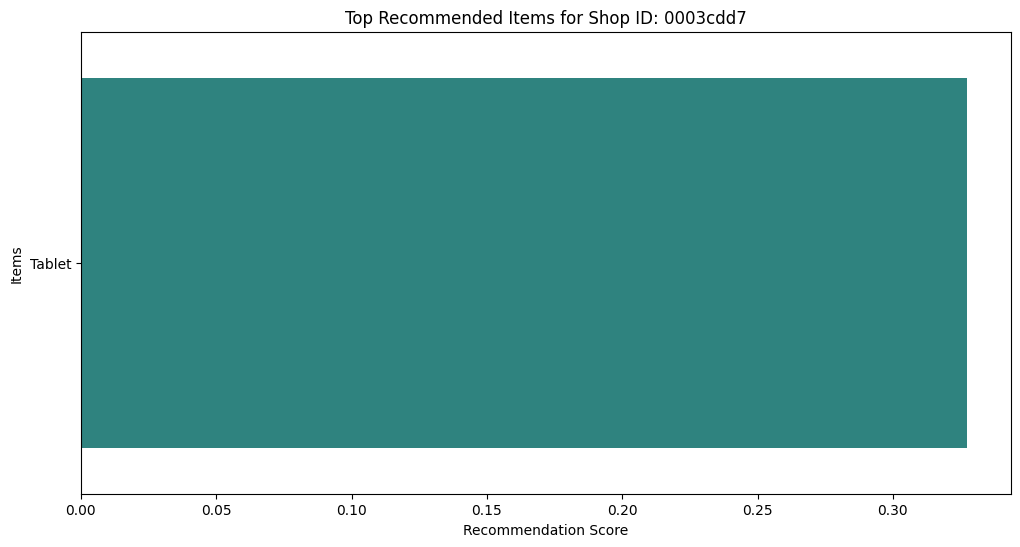

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a specific shop (Replace with any Shop_ID from your dataset)
shop_id ="0003cdd7"  # Example Shop_ID

# Filter data for the shop
shop_data = df[df["Shop_ID"] == shop_id].sort_values(by="Recommendation_Score", ascending=False).head(10)

# Plot recommendations
plt.figure(figsize=(12, 6))
sns.barplot(x=shop_data["Recommendation_Score"], y=shop_data["Item"], palette="viridis")
plt.xlabel("Recommendation Score")
plt.ylabel("Items")
plt.title(f"Top Recommended Items for Shop ID: {shop_id}")
plt.show()


In [ ]:
df=pd.read_csv("final_recommendation_data.csv")
df.head()

,Item,Sales_Count,Stock_Level,Demand_Score,Profit_Margin,Competitor_Saturation,Reorder_Frequency,Stock_to_Sales_Ratio,Demand_to_Stock_Ratio,Location_Bangalore,...,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam,Category_Electronics,Category_Grocery,Category_Home Essentials,Category_Stationery,Recommendation_Score,Shop_ID
0,Camera,0.207879,0.458586,0.850,0.920000,17,0.207879,0.379662,0.582756,False,...,False,True,False,False,True,False,False,False,0.201853,8e09efc9
1,Detergent,0.076566,0.733333,0.475,0.671333,25,0.076566,0.681178,0.274038,False,...,False,False,False,False,False,False,True,False,0.076231,8ed9e3ef
2,Formal Shirt,0.127475,0.393939,0.725,0.496000,22,0.127475,0.349400,0.520109,False,...,False,False,False,False,False,False,False,False,0.126391,4487fd35
3,T-shirt,0.525859,0.393939,0.800,0.141556,12,0.525859,0.258176,0.573913,True,...,False,False,False,False,False,False,False,False,0.529283,b2f6795e
4,Milk,0.605253,0.771717,0.500,0.851778,15,0.605253,0.480745,0.282212,False,...,True,False,False,False,False,True,False,False,0.605325,ddbdd1a9


In [ ]:
print(encoded_basket.head())
print(encoded_basket.sum(axis=0))  # Check item frequencies


   Tablet  Mop  Camera  TV  Flour  Mobile  Detergent  Hoodie  Stapler  \
0       1    0       0   0      0       0          0       0        0   
1       0    1       0   0      0       0          0       0        0   
2       0    0       1   0      0       0          0       0        0   
3       0    0       0   1      0       0          0       0        0   
4       0    0       0   0      1       0          0       0        0   

   Sneakers  ...  Sanitizer  Sugar  Sweater  Milk  Eraser  Highlighter  \
0         0  ...          0      0        0     0       0            0   
1         0  ...          0      0        0     0       0            0   
2         0  ...          0      0        0     0       0            0   
3         0  ...          0      0        0     0       0            0   
4         0  ...          0      0        0     0       0            0   

   Laptop  Glue  Wheat  Headphones  
0       0     0      0           0  
1       0     0      0           0  
2    

In [ ]:
item_pairs = encoded_basket.T.dot(encoded_basket)
print("🔍 Item Co-occurrence Matrix:\n", item_pairs)


🔍 Item Co-occurrence Matrix:
                    Tablet    Mop  Camera     TV  Flour  Mobile  Detergent  \
Tablet               True  False   False  False  False   False      False   
Mop                 False   True   False  False  False   False      False   
Camera              False  False    True  False  False   False      False   
TV                  False  False   False   True  False   False      False   
Flour               False  False   False  False   True   False      False   
Mobile              False  False   False  False  False    True      False   
Detergent           False  False   False  False  False   False       True   
Hoodie              False  False   False  False  False   False      False   
Stapler             False  False   False  False  False   False      False   
Sneakers            False  False   False  False  False   False      False   
Jacket              False  False   False  False  False   False      False   
T-shirt             False  False   False  Fals

In [ ]:
grouped_basket = df.groupby("Shop_ID")["Item"].apply(lambda x: list(set(x))).reset_index()


In [ ]:
print(df.columns)


Index(['Item', 'Sales_Count', 'Stock_Level', 'Demand_Score', 'Profit_Margin',
       'Competitor_Saturation', 'Reorder_Frequency', 'Stock_to_Sales_Ratio',
       'Demand_to_Stock_Ratio', 'Location_Bangalore', 'Location_Bhopal',
       'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Indore', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Lucknow', 'Location_Mumbai', 'Location_Nagpur',
       'Location_Pune', 'Location_Surat', 'Location_Visakhapatnam',
       'Category_Electronics', 'Category_Grocery', 'Category_Home Essentials',
       'Category_Stationery', 'Recommendation_Score', 'Shop_ID'],
      dtype='object')


In [ ]:
df=pd.read_csv("final_recommendation_data.csv")
df.head()

,Item,Sales_Count,Stock_Level,Demand_Score,Profit_Margin,Competitor_Saturation,Reorder_Frequency,Stock_to_Sales_Ratio,Demand_to_Stock_Ratio,Location_Bangalore,...,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam,Category_Electronics,Category_Grocery,Category_Home Essentials,Category_Stationery,Recommendation_Score,Shop_ID
0,Camera,0.207879,0.458586,0.850,0.920000,17,0.207879,0.379662,0.582756,False,...,False,True,False,False,True,False,False,False,0.201853,8e09efc9
1,Detergent,0.076566,0.733333,0.475,0.671333,25,0.076566,0.681178,0.274038,False,...,False,False,False,False,False,False,True,False,0.076231,8ed9e3ef
2,Formal Shirt,0.127475,0.393939,0.725,0.496000,22,0.127475,0.349400,0.520109,False,...,False,False,False,False,False,False,False,False,0.126391,4487fd35
3,T-shirt,0.525859,0.393939,0.800,0.141556,12,0.525859,0.258176,0.573913,True,...,False,False,False,False,False,False,False,False,0.529283,b2f6795e
4,Milk,0.605253,0.771717,0.500,0.851778,15,0.605253,0.480745,0.282212,False,...,True,False,False,False,False,True,False,False,0.605325,ddbdd1a9


In [ ]:
from itertools import combinations
from collections import defaultdict
import numpy as np

# Get list of unique items
unique_items = sorted(set(df["Item"]))

# Initialize co-occurrence matrix
co_occurrence = defaultdict(lambda: defaultdict(int))

# Iterate through transactions and count co-occurrences
for items in grouped_basket["Item"]:
    for item1, item2 in combinations(items, 2):  # Pairwise combinations
        co_occurrence[item1][item2] += 1
        co_occurrence[item2][item1] += 1  # Since it's symmetric

# Convert to DataFrame
co_matrix = pd.DataFrame(co_occurrence).fillna(0)
co_matrix = co_matrix.astype(int)

print("✅ Co-occurrence Matrix Created!")


✅ Co-occurrence Matrix Created!


In [ ]:
# Find the top co-occurring items for each product
top_co_occurrences = {item: co_matrix[item].sort_values(ascending=False).head(5) for item in co_matrix.columns}

# Display results
for item, recommendations in top_co_occurrences.items():
    print(f"🔹 If a shop sells '{item}', they might also sell: {list(recommendations.index)}")


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Create a pivot table where rows = shops, columns = items, values = frequency
shop_item_matrix = df.pivot_table(index="Shop_ID", columns="Item", aggfunc="size", fill_value=0)

# Convert to sparse matrix
sparse_matrix = csr_matrix(shop_item_matrix)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
item_similarity = cosine_similarity(sparse_matrix.T)  # Transpose to get item-item similarity

# Convert to DataFrame
item_sim_df = pd.DataFrame(item_similarity, index=shop_item_matrix.columns, columns=shop_item_matrix.columns)

print("✅ Item Similarity Matrix Created Successfully!")


✅ Item Similarity Matrix Created Successfully!


In [ ]:
def get_similar_items(item_name, top_n=5):
    if item_name not in item_sim_df.index:
        print(f"Item '{item_name}' not found in the similarity matrix.")
        return None

    similar_items = item_sim_df[item_name].sort_values(ascending=False)[1:top_n+1]  # Exclude itself
    return similar_items

# Example: Get top 5 similar items for "Laptop"
similar_items = get_similar_items("Laptop", top_n=5)
print(similar_items)


Item
Coffee               0.0
Cooking Oil          0.0
Detergent            0.0
Dishwasher Liquid    0.0
Eggs                 0.0
Name: Laptop, dtype: float64


In [ ]:
print(sparse_matrix.shape)  # Should be (num_shops, num_items)
print(sparse_matrix.nnz)    # Count of nonzero values (should not be too low)


(10000, 41)
10000


In [ ]:
import pandas as pd

shop_item_counts = (sparse_matrix > 0).sum(axis=1)  # Count nonzero values per row
shop_item_counts_series = pd.Series(shop_item_counts.A1)  # Convert to Pandas Series

print(shop_item_counts_series.describe())  # Now it works!


count    10000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64


In [ ]:
import pandas as pd

# Sample dataset (Modify this to your dataset)
df = pd.read_csv("final_recommendation_data.csv")  # Load your actual data

# Compute total sales per item
popular_items = df.groupby("Item")["Sales_Count"].sum().sort_values(ascending=False)

# Convert to DataFrame for better readability
popular_items_df = popular_items.reset_index().rename(columns={"Sales_Count": "Total_Sales"})

print("🔥 Top 10 Best-Selling Items:")
print(popular_items_df.head(10))  # Display top 10 items


🔥 Top 10 Best-Selling Items:
                Item  Total_Sales
0          Detergent   151.775152
1                Mop   151.086667
2            Shampoo   148.853333
3               Soap   142.473535
4  Dishwasher Liquid   141.863434
5             Eraser   139.457778
6         Toothpaste   139.094545
7            T-shirt   134.110707
8              Saree   133.079596
9          Sanitizer   132.499394


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("final_recommendation_data.csv")

# Check column names
print(df.columns)

# Display first few rows
df.head()


Index(['Item', 'Sales_Count', 'Stock_Level', 'Demand_Score', 'Profit_Margin',
       'Competitor_Saturation', 'Reorder_Frequency', 'Stock_to_Sales_Ratio',
       'Demand_to_Stock_Ratio', 'Location_Bangalore', 'Location_Bhopal',
       'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Indore', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Lucknow', 'Location_Mumbai', 'Location_Nagpur',
       'Location_Pune', 'Location_Surat', 'Location_Visakhapatnam',
       'Category_Electronics', 'Category_Grocery', 'Category_Home Essentials',
       'Category_Stationery', 'Recommendation_Score', 'Shop_ID'],
      dtype='object')


,Item,Sales_Count,Stock_Level,Demand_Score,Profit_Margin,Competitor_Saturation,Reorder_Frequency,Stock_to_Sales_Ratio,Demand_to_Stock_Ratio,Location_Bangalore,...,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam,Category_Electronics,Category_Grocery,Category_Home Essentials,Category_Stationery,Recommendation_Score,Shop_ID
0,Camera,0.207879,0.458586,0.850,0.920000,17,0.207879,0.379662,0.582756,False,...,False,True,False,False,True,False,False,False,0.201853,8e09efc9
1,Detergent,0.076566,0.733333,0.475,0.671333,25,0.076566,0.681178,0.274038,False,...,False,False,False,False,False,False,True,False,0.076231,8ed9e3ef
2,Formal Shirt,0.127475,0.393939,0.725,0.496000,22,0.127475,0.349400,0.520109,False,...,False,False,False,False,False,False,False,False,0.126391,4487fd35
3,T-shirt,0.525859,0.393939,0.800,0.141556,12,0.525859,0.258176,0.573913,True,...,False,False,False,False,False,False,False,False,0.529283,b2f6795e
4,Milk,0.605253,0.771717,0.500,0.851778,15,0.605253,0.480745,0.282212,False,...,True,False,False,False,False,True,False,False,0.605325,ddbdd1a9


In [ ]:
# Compute total sales & demand-weighted scores
df["Sales_Demand_Score"] = df["Sales_Count"] * df["Demand_Score"]

# Rank items by total sales and demand
popular_items = df.groupby("Item")["Sales_Demand_Score"].sum().sort_values(ascending=False)

# Convert to DataFrame
popular_items_df = popular_items.reset_index().rename(columns={"Sales_Demand_Score": "Total_Sales_Demand"})

def get_popular_items(top_n=10):
    return popular_items_df.head(top_n)["Item"].tolist()

# Example usage
print(get_popular_items(10))


['Mop', 'Shampoo', 'Eraser', 'Soap', 'Detergent', 'T-shirt', 'Dishwasher Liquid', 'Marker', 'Camera', 'Toothpaste']


In [ ]:
# Compute profitability index
df["Profit_Score"] = df["Profit_Margin"] / df["Competitor_Saturation"]

# Rank items by profit score
profit_items = df.groupby("Item")["Profit_Score"].mean().sort_values(ascending=False)

# Convert to DataFrame
profit_items_df = profit_items.reset_index().rename(columns={"Profit_Score": "Profitability"})

def get_profitable_items(top_n=10):
    return profit_items_df.head(top_n)["Item"].tolist()

# Example usage
print(get_profitable_items(10))



['Coffee', 'Pulses', 'Sugar', 'Rice', 'Wheat', 'Eggs', 'Cooking Oil', 'Jacket', 'Tea', 'Milk']


In [ ]:
def get_location_specific_items(location_col, top_n=10):
    # Filter items where the location column is True
    location_items = df[df[location_col] == True]

    # Rank by demand and sales
    top_location_items = location_items.groupby("Item")["Sales_Demand_Score"].sum().sort_values(ascending=False)

    return top_location_items.head(top_n).index.tolist()

# Example usage:
print(get_location_specific_items("Location_Mumbai", 10))


['Toothpaste', 'Camera', 'Sanitizer', 'Smartwatch', 'Dishwasher Liquid', 'Mobile', 'Eraser', 'Jacket', 'Saree', 'Notebook']


In [ ]:
def inventory_based_recommendation(shop_id, capacity_threshold=50):
    shop_stock = df[df["Shop_ID"] == shop_id]["Stock_Level"].sum()

    if shop_stock < capacity_threshold:
        return get_profitable_items(5)  # Small shops → Focus on profit
    else:
        return get_popular_items(10)  # Large shops → Focus on high sales

# Example usage:
print(inventory_based_recommendation(shop_id="8e09efc9"))



['Coffee', 'Pulses', 'Sugar', 'Rice', 'Wheat']


In [ ]:
#important:def final_recommendation(shop_id, location_col, capacity_threshold=50):
    # Get personalized recommendations
    popular = get_popular_items(5)
    profitable = get_profitable_items(5)
    location_based = get_location_specific_items(location_col, 5)
    inventory_based = inventory_based_recommendation(shop_id, capacity_threshold)

    # Merge and remove duplicates
    final_items = list(set(popular + profitable + location_based + inventory_based))

    return final_items[:10]  # Top 10 recommendations

# Example usage:
print(final_recommendation(shop_id="8e09efc9", location_col="Location_Mumbai"))


['Detergent', 'Coffee', 'Shampoo', 'Pulses', 'Eraser', 'Wheat', 'Rice', 'Mop', 'Camera', 'Sugar']


In [ ]:
#Testing:
print(get_popular_items(10))  # Expect: Items with the highest Sales_Count


['Mop', 'Shampoo', 'Eraser', 'Soap', 'Detergent', 'T-shirt', 'Dishwasher Liquid', 'Marker', 'Camera', 'Toothpaste']


In [ ]:
print(get_profitable_items(10))  # Expect: Items with highest Profit_Margin



['Coffee', 'Pulses', 'Sugar', 'Rice', 'Wheat', 'Eggs', 'Cooking Oil', 'Jacket', 'Tea', 'Milk']


In [ ]:
print(get_location_specific_items("Location_Bhopal", 10))  # Expect: Items common in Mumbai


['Shampoo', 'Pencil', 'Eraser', 'Sneakers', 'Dishwasher Liquid', 'Stapler', 'Speakers', 'Pulses', 'Saree', 'Highlighter']


In [ ]:
print(inventory_based_recommendation(shop_id="8e09efc9", capacity_threshold=50))
# Expect: Items that need restocking based on stock levels


['Coffee', 'Pulses', 'Sugar', 'Rice', 'Wheat']


In [ ]:
print(final_recommendation(shop_id="8e09efc9", location_col="Location_Mumbai"))
# Expect: A mix of popular, profitable, location-specific, and inventory-checked items


['Detergent', 'Coffee', 'Shampoo', 'Pulses', 'Eraser', 'Wheat', 'Rice', 'Mop', 'Camera', 'Sugar']


In [ ]:
import numpy as np
import pandas as pd
import random

# Load dataset
df = pd.read_csv("final_recommendation_data.csv")

# Define states (binned stock level, demand score, competitor saturation)
def get_state(stock, demand, competitor):
    stock_state = min(int(stock * 4), 3)  # Convert stock to 4 bins (0-3)
    demand_state = min(int(demand * 4), 3)  # Convert demand to 4 bins (0-3)
    competitor_state = min(int(competitor / 5), 3)  # Convert competitor to 4 bins (0-3)
    return (stock_state, demand_state, competitor_state)

# Define actions
actions = ["Increase", "Decrease", "Maintain"]
num_actions = len(actions)

# Initialize Q-table
Q_table = {}

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.05  # Less exploration for faster learning

# Faster Training Loop
for _ in range(500):  # Reduced from 10,000 to 3,000 for speed
    sampled_data = df.sample(frac=0.3)  # Process 30% of rows in each iteration (batching)
    for _, row in sampled_data.iterrows():
        state = get_state(row["Stock_Level"], row["Demand_Score"], row["Competitor_Saturation"])
        if state not in Q_table:
            Q_table[state] = np.zeros(num_actions)

        # Choose action (epsilon-greedy)
        action = random.choice(range(num_actions)) if random.uniform(0, 1) < epsilon else np.argmax(Q_table[state])

        # Reward function
        if action == 0:  # Increase stock
            reward = row["Demand_Score"] * 2 - row["Stock_Level"]
        elif action == 1:  # Decrease stock
            reward = row["Stock_Level"] - row["Demand_Score"] * 1.5
        else:  # Maintain stock
            reward = row["Profit_Margin"] * 2 - row["Competitor_Saturation"]

        # Next state (simulating small changes)
        next_state = get_state(row["Stock_Level"] * 0.95, row["Demand_Score"] * 1.05, row["Competitor_Saturation"] * 1.02)

        # Q-learning update
        if next_state not in Q_table:
            Q_table[next_state] = np.zeros(num_actions)

        Q_table[state][action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state][action])

# Function to recommend stock action
def recommend_stock_action(shop_id):
    shop_data = df[df["Shop_ID"] == shop_id].iloc[0]
    state = get_state(shop_data["Stock_Level"], shop_data["Demand_Score"], shop_data["Competitor_Saturation"])
    return actions[np.argmax(Q_table.get(state, np.zeros(num_actions)))]  # Default to best action or Maintain

# Example: Get recommendation for a shop
shop_id = "8e09efc9"
print(f"📢 Recommended Action for Shop {shop_id}: {recommend_stock_action(shop_id)}")


📢 Recommended Action for Shop 8e09efc9: Increase


In [ ]:
print(df[df["Shop_ID"] == "8e09efc9"])


     Item  Sales_Count  Stock_Level  Demand_Score  Profit_Margin  \
0  Camera     0.207879     0.458586          0.85           0.92   

   Competitor_Saturation  Reorder_Frequency  Stock_to_Sales_Ratio  \
0                     17           0.207879              0.379662   

   Demand_to_Stock_Ratio  Location_Bangalore  ...  Location_Nagpur  \
0               0.582756               False  ...            False   

   Location_Pune  Location_Surat  Location_Visakhapatnam  \
0           True           False                   False   

   Category_Electronics  Category_Grocery  Category_Home Essentials  \
0                  True             False                     False   

   Category_Stationery  Recommendation_Score   Shop_ID  
0                False              0.201853  8e09efc9  

[1 rows x 29 columns]


In [ ]:
print(df[df["Shop_ID"] == "8e09efc9"][["Stock_Level", "Demand_Score", "Competitor_Saturation"]])


   Stock_Level  Demand_Score  Competitor_Saturation
0     0.458586          0.85                     17


In [ ]:
print(recommend_stock_action("8e09efc9"))


Increase


In [ ]:
from google.colab import files

# Download the file
files.download("final_recommendation_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=pd.read_csv("final_recommendation_data.csv")
df

,Item,Sales_Count,Stock_Level,Demand_Score,Profit_Margin,Competitor_Saturation,Reorder_Frequency,Stock_to_Sales_Ratio,Demand_to_Stock_Ratio,Location_Bangalore,...,Location_Nagpur,Location_Pune,Location_Surat,Location_Visakhapatnam,Category_Electronics,Category_Grocery,Category_Home Essentials,Category_Stationery,Recommendation_Score,Shop_ID
0,Camera,0.207879,0.458586,0.850,0.920000,17,0.207879,0.379662,0.582756,False,...,False,True,False,False,True,False,False,False,0.201853,8e09efc9
1,Detergent,0.076566,0.733333,0.475,0.671333,25,0.076566,0.681178,0.274038,False,...,False,False,False,False,False,False,True,False,0.076231,8ed9e3ef
2,Formal Shirt,0.127475,0.393939,0.725,0.496000,22,0.127475,0.349400,0.520109,False,...,False,False,False,False,False,False,False,False,0.126391,4487fd35
3,T-shirt,0.525859,0.393939,0.800,0.141556,12,0.525859,0.258176,0.573913,True,...,False,False,False,False,False,False,False,False,0.529283,b2f6795e
4,Milk,0.605253,0.771717,0.500,0.851778,15,0.605253,0.480745,0.282212,False,...,True,False,False,False,False,True,False,False,0.605325,ddbdd1a9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Toothpaste,0.370505,0.236364,0.725,0.849111,15,0.370505,0.172465,0.586397,False,...,False,False,False,False,False,False,True,False,0.370365,47abf0b6
9996,Hoodie,0.851313,0.729293,0.750,0.600222,12,0.851313,0.393933,0.433703,False,...,False,False,False,False,False,False,False,False,0.852856,7e654d60
9997,Marker,0.078182,0.404040,0.750,0.438222,12,0.078182,0.374742,0.534173,False,...,False,False,False,False,False,False,False,True,0.078311,0f805652
9998,Detergent,0.211717,0.688889,0.875,0.226667,14,0.211717,0.568523,0.518092,False,...,False,False,False,False,False,False,True,False,0.204069,0bf45236


In [ ]:
df = pd.read_csv("final_recommendation_data.csv")
print(df.columns.tolist())  # See all column names


['Item', 'Sales_Count', 'Stock_Level', 'Demand_Score', 'Profit_Margin', 'Competitor_Saturation', 'Reorder_Frequency', 'Stock_to_Sales_Ratio', 'Demand_to_Stock_Ratio', 'Location_Bangalore', 'Location_Bhopal', 'Location_Chennai', 'Location_Delhi', 'Location_Hyderabad', 'Location_Indore', 'Location_Jaipur', 'Location_Kolkata', 'Location_Lucknow', 'Location_Mumbai', 'Location_Nagpur', 'Location_Pune', 'Location_Surat', 'Location_Visakhapatnam', 'Category_Electronics', 'Category_Grocery', 'Category_Home Essentials', 'Category_Stationery', 'Recommendation_Score', 'Shop_ID']


In [ ]:
df = pd.read_csv("final_recommendation_data.csv")
print(df["Location_Nagpur"].unique())  # Check unique values


[False  True]


In [ ]:
import pandas as pd

df = pd.read_csv("final_recommendation_data.csv")  # Replace with actual CSV file path
df["Shop_ID"] = df["Shop_ID"].astype(str)  # Ensure IDs are strings
df["Shop_ID"] = df["Shop_ID"].str.strip()  # Ensure IDs are strings

print("Shop IDs in CSV:", df["Shop_ID"].tolist())  # Print all IDs


Shop IDs in CSV: ['8e09efc9', '8ed9e3ef', '4487fd35', 'b2f6795e', 'ddbdd1a9', '65369c70', '596a7969', '71e40840', 'a7d7cbbd', '58e5e2a7', '71030534', '2339ebd5', 'a78d4d6e', 'd3f0bbaa', '82446a9d', 'e4af034d', 'ba1da618', '61d0959a', '0d74a896', '15073093', '708b15c8', '1d97564e', '7d064ba1', '0d592133', '451006f3', '3dc16b04', 'b4a74791', '06ca1fff', '578664af', '4f01250a', 'd74911ba', 'd34c1c20', '193a01b5', 'e485f1ee', 'b6616102', 'fabda04c', 'b998de88', 'f812281b', '2807325a', '5dbc9529', 'b9adb7b7', 'b8314caf', '85f2f6f1', 'e5fd483c', '53d51db8', '12761302', '75c6425e', '3e95d831', '4eadf021', 'e0d78036', '49e1134d', '567c4b18', '41690a21', '769727e7', 'd0c4d809', '98a8b64a', 'd3e6d360', '7e52c46a', 'd33fca70', '250e7097', '10893c48', 'bc08854f', '52696f2b', '6bdfeea3', '8cf1e5a8', 'ffacd0b7', '3613fe75', '6b11614c', 'de4bb411', 'ceb8efe7', '8cb2957b', '0a844f99', '996a8281', 'a26b2d87', 'f2429d39', '6fadee57', '10d66ed5', 'f30da104', '13366bbf', 'e056ba99', '575c7b91', '700b4a6f'

In [ ]:
print(df["Item"].unique().tolist())


['Camera', 'Detergent', 'Formal Shirt', 'T-shirt', 'Milk', 'Dishwasher Liquid', 'Glue', 'Sanitizer', 'Eraser', 'Sneakers', 'Tablet', 'Coffee', 'Pen', 'Pulses', 'Eggs', 'Pencil', 'Hoodie', 'Stapler', 'Notebook', 'Wheat', 'Sweater', 'Jacket', 'Smartwatch', 'Soap', 'Tea', 'Jeans', 'Sugar', 'Saree', 'Marker', 'Laptop', 'Rice', 'Mobile', 'Shampoo', 'Toothpaste', 'Headphones', 'Mop', 'Flour', 'TV', 'Speakers', 'Cooking Oil', 'Highlighter']


In [ ]:
print("milk" in df["Item"].values)


False


In [ ]:
# Load dataset
df = pd.read_csv("final_recommendation_data.csv")

# ✅ Normalize Item names in the dataset (strip spaces, lowercase)
df["Item"] = df["Item"].astype(str).str.strip().str.lower()


In [ ]:
print("milk" in df["Item"].values)


True


In [ ]:
from google.colab import files

# Download the file
files.download("final_recommendation_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>